# 1.数据预处理

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns

In [154]:
iris = pd.read_csv('./Desktop/iris.csv')
iris.info(),iris.describe()
#根据describe的结果判断需不需要做归一化处理
#根据平均值和max，min可知各类数据间差距不大，无异常值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
species              150 non-null object
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


(None,        sepal length (cm)  sepal width (cm)  petal length (cm)  \
 count         150.000000        150.000000         150.000000   
 mean            5.843333          3.057333           3.758000   
 std             0.828066          0.435866           1.765298   
 min             4.300000          2.000000           1.000000   
 25%             5.100000          2.800000           1.600000   
 50%             5.800000          3.000000           4.350000   
 75%             6.400000          3.300000           5.100000   
 max             7.900000          4.400000           6.900000   
 
        petal width (cm)      target  
 count        150.000000  150.000000  
 mean           1.199333    1.000000  
 std            0.762238    0.819232  
 min            0.100000    0.000000  
 25%            0.300000    0.000000  
 50%            1.300000    1.000000  
 75%            1.800000    2.000000  
 max            2.500000    2.000000  )

In [155]:
iris1 = iris.drop("target",axis = 1)
iris1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,0,5.1,3.5,1.4,0.2,0.0,setosa
1,1,4.9,3.0,1.4,0.2,0.0,setosa
2,2,4.7,3.2,1.3,0.2,0.0,setosa
3,3,4.6,3.1,1.5,0.2,0.0,setosa
4,4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2.0,virginica
146,146,6.3,2.5,5.0,1.9,2.0,virginica
147,147,6.5,3.0,5.2,2.0,2.0,virginica
148,148,6.2,3.4,5.4,2.3,2.0,virginica


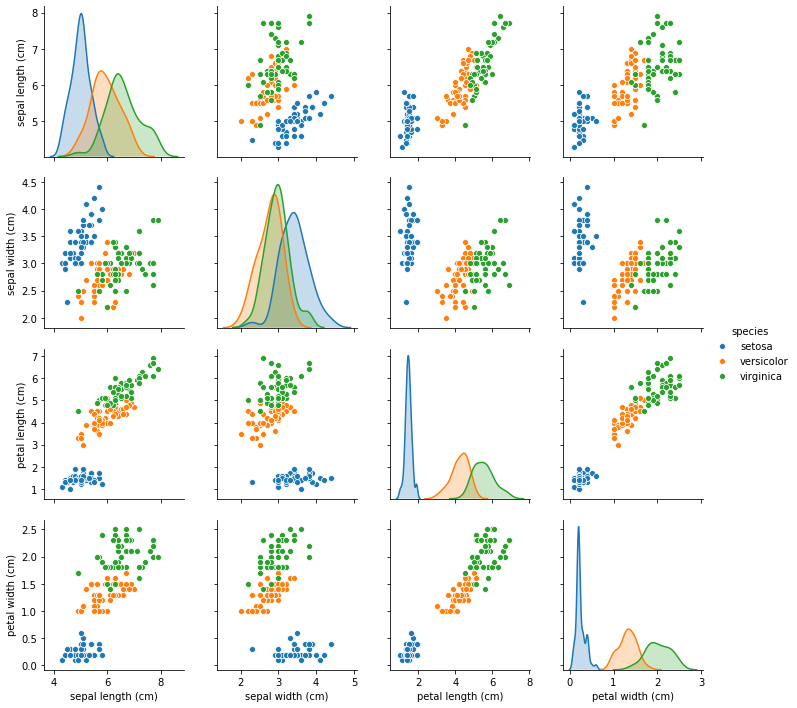

In [156]:
sns.pairplot(data = iris1,hue = 'species')#hue -> 分类标签
#当图重叠时就表示无法根据这个特征去区分种类
#使用sepal lenth和sepal width并不能很好的分类，所以删掉这两个特征

In [159]:
iris1 = iris1.drop(["sepal length (cm)","sepal width (cm)"],axis=1)

KeyError: "['sepal length (cm)' 'sepal width (cm)'] not found in axis"

**1.1 贴标签**

In [160]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris1["species"] = encoder.fit_transform(iris["species"])

iris1

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


**1.2 归一化处理**

In [161]:
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()

td_std = trans.fit_transform(iris1[["petal length (cm)",'petal width (cm)']])#有两个列，所以需要再加一个方括号
td_std = pd.DataFrame(td_std,columns = ["petal length (cm)",'petal width (cm)'])#有两个列，所以需要再加一个方括号

td_std

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444
...,...,...
145,0.819596,1.448832
146,0.705921,0.922303
147,0.819596,1.053935
148,0.933271,1.448832


**1.4 将数据拆分为训练集和测试集**

In [162]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(iris1,test_size = 0.2)

In [163]:
train_set_x = train_set[["petal length (cm)","petal width (cm)"]]
train_set_y = train_set["species"]
test_set_x = test_set[["petal length (cm)","petal width (cm)"]]
test_set_y = test_set["species"]

,petal length (cm),petal width (cm)
78,4.5,1.5
54,4.6,1.5
123,4.9,1.8
133,5.1,1.5
119,5.0,1.5
...,...,...
92,4.0,1.2
129,5.8,1.6
41,1.3,0.3
139,5.4,2.1


# 算法实现

#### 2.1 逻辑回归处理多分类问题

###### 建模

In [164]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga',max_iter=1000)
clf.fit(train_set_x,train_set_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

###### 预测

In [165]:
res = clf.predict(test_set_x)

###### 评估

In [166]:
accuracy = clf.score(test_set_x,test_set_y)
print("accuracy: {:.0%} ".format(accuracy))

accuracy: 97% 


###### 结果可视化

In [176]:
# 定义绘图函数 draw（）
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
def draw(clf):        
    M, N = 500, 500 
    x1_min,  x2_min  =  iris1[["petal length (cm)","petal width (cm)"]]. min(axis=0) #  取两根轴的最值，axis=0 表示沿竖轴运作，
    x1_max,  x2_max  =  iris1[["petal length (cm)","petal width (cm)"]]. max(axis=0) #  因此取的就是花瓣长度和宽度的最值。
    t1  =  np.linspace(x1_min,  x1_max,  M)  #  将两根轴等差均分成 500 段并赋值给向量t1 t2     
    t2 = np.linspace(x2_min, x2_max, N)     
    x1, x2 = np.meshgrid(t1, t2)     # 用 meshgrid 生成两个数组，第一个是t1，t2交叉后所有点的横坐标；第二个数组是纵坐标；并分别把所有横，纵坐标赋值给x1和x2两个向量    
    # 预测
    x_show  =  np.stack((x1.flat,  x2.flat),  axis=1)  #flat 功能先将 x1 和 x2 拉平成长度为【500】的数组，stack函数在第二维度（axis=1）上增加，
    #组成【500，2】的矩阵，每一行其实就是某一个点的坐标。    
    
    y_predict = clf.predict(x_show)#为每个点预测分类结果，为绘制预测区域做准备。形状为【500，1】          
    # 配色    
    cm_light = mpl.colors.ListedColormap(["#A0FFA0", "#FFA0A0", "#A0A0FF"])   
    cm_dark = mpl.colors.ListedColormap(["g", "r", "b"])       
    # 绘制预测区域图    
    plt.figure(figsize=(10, 6))#生成图像区域，并指定比例    
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)     
    # pcolormesh用来画背景预测区域，t1横坐标，t2纵坐标，第三项分类标签，第四项颜色        
    # 绘制原始数据点    
    plt.scatter(iris1["petal length (cm)"],iris1["petal width (cm)"],c=iris1["species"], label=None, cmap=cm_dark, marker='o', edgecolors='k')   
    plt.xlabel("Petal.Length")    
    plt.ylabel("Petal.Width")
    
    # 绘制图例    
    color = ["g", "r", "b"]    
    species = ["setosa", "virginica", "versicolor"]    
    for i in range(3):        
        plt.scatter([], [], c=color[i], s=40, label=species[i])    # 利用空点绘制图例：    
    
    plt.legend(loc="best")
    
    plt.title('iris_classfier')

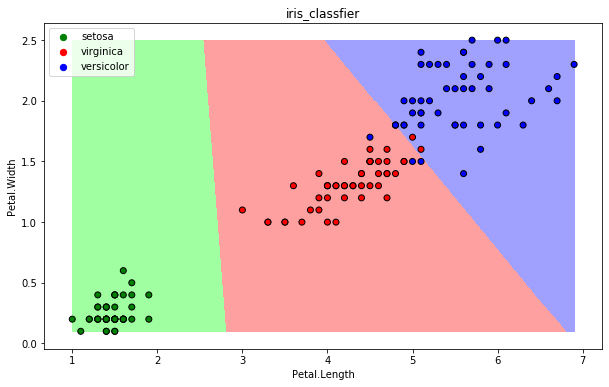

In [177]:
draw(clf)

In [178]:
out = test_set_x.copy()
out["y"]=test_set_y
out["pre"]=res
out

,petal length (cm),petal width (cm),y,pre
95,4.2,1.2,1,1
47,1.4,0.2,0,0
125,6.0,1.8,2,2
106,4.5,1.7,2,1
3,1.5,0.2,0,0
37,1.4,0.1,0,0
129,5.8,1.6,2,2
4,1.4,0.2,0,0
93,3.3,1.0,1,1
107,6.3,1.8,2,2
